In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
%matplotlib inline

In [64]:
wine = pd.read_csv("../Downloads/wine.csv", header = None)
X = wine.iloc[:,1:]
y = wine.iloc[:,0]
sc = StandardScaler()
X = sc.fit_transform(X)

In [40]:
pca = PCA(0.8)
X_pca = pca.fit_transform(X)


In [41]:
y = y.reset_index(name='Target')

In [42]:
y.drop('index',axis = 1, inplace = True)

In [43]:
X_pca = pd.DataFrame(X_pca , columns = ['PC1','PC2','PC3','PC4','PC5'])
X_pca = pd.concat([X_pca , pd.DataFrame(y)] , axis = 1)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,Target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,1


Text(0, 0.5, 'Second Principal Component')

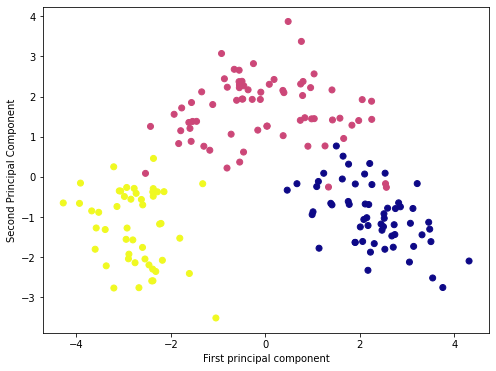

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca.iloc[:,0],X_pca.iloc[:,1],c=wine.iloc[:,0],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

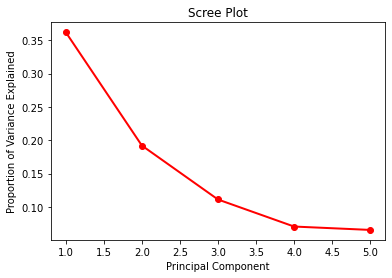

In [46]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [65]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [66]:
lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [67]:
X_lda = pd.DataFrame(X_lda)
X_lda

,0,1
0,4.356144,2.002695
1,1.966479,-2.577425
2,3.268066,0.870394
3,-4.999142,1.389270
4,-0.222865,-2.338233
...,...,...
137,-3.478879,0.729879
138,1.296393,0.557680
139,0.853088,-2.346023
140,3.040362,0.322805


Text(0, 0.5, 'Second LDA')

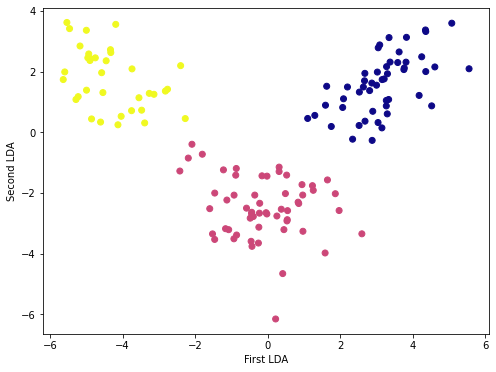

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(X_lda.iloc[:,0],X_lda.iloc[:,1],c=y_train,cmap='plasma')
plt.xlabel('First LDA')
plt.ylabel('Second LDA')